# download the dataset from 
https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Ungraded Lab: Training with ImageDataGenerator
In this lab, you will build a train a model on the Horses or Humans dataset. This contains over a thousand images of horses and humans with varying poses and filesizes. You will use the ImageDataGenerator class to prepare this dataset so it can be fed to a convolutional neural network.

IMPORTANT NOTE: This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

Run the code below to download the compressed dataset horse-or-human.zip.

In [88]:
import zipfile

In [89]:
#unzip the datasets
local_zip='datasets/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('datasets/horse-or-human')
zip_ref.close()

In [90]:
import os
train_horse_dir=os.path.join('datasets/horse-or-human/horses/')
train_human_dir=os.path.join('datasets/horse-or-human/humans/')

In [91]:
train_horse_names=os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names=os.listdir(train_human_dir)
print(train_human_names[:10])

['horse01-0.png', 'horse01-1.png', 'horse01-2.png', 'horse01-3.png', 'horse01-4.png', 'horse01-5.png', 'horse01-6.png', 'horse01-7.png', 'horse01-8.png', 'horse01-9.png']
['human01-00.png', 'human01-01.png', 'human01-02.png', 'human01-03.png', 'human01-04.png', 'human01-05.png', 'human01-06.png', 'human01-07.png', 'human01-08.png', 'human01-09.png']


In [92]:
len(train_horse_names), len(train_human_names)

(500, 527)

In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [94]:
nrows = 4
ncols = 4

In [95]:
pic_index = 0 

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

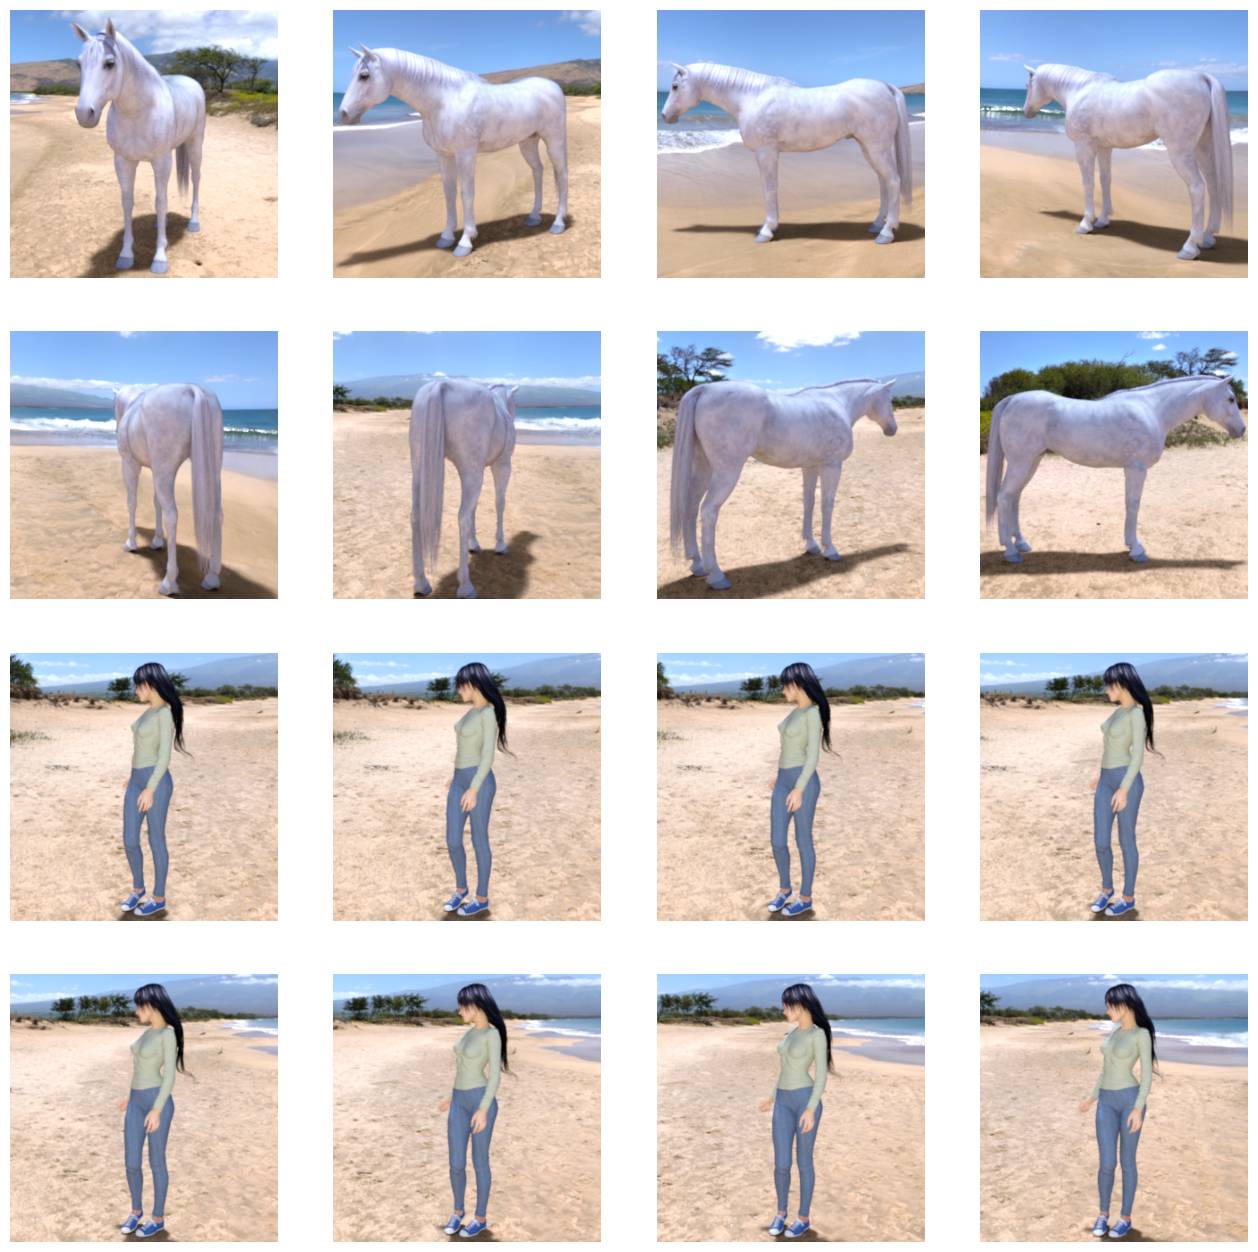

In [96]:
fig=plt.gcf()
fig.set_size_inches(ncols*4, nrows *4)
pic_index+=8
next_horse_pix=[os.path.join(train_horse_dir,fname)
                   for fname in train_horse_names[pic_index-8:pic_index]
               ]
next_human_pix=[ os.path.join(train_human_dir,fname)
                    for fname in train_human_names[pic_index-8:pic_index]
                ]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')

    img=mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

# Building a small model from scratch

In [97]:
import tensorflow as tf

In [128]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [129]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 35, 35, 64)      

In [130]:
from tensorflow.keras.optimizers import RMSprop

In [131]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

# Data Preprocessing

Next step is to set up the data generators that will read pictures in the source folders, convert them to float32 tensors, and feed them (with their labels) to the model. You'll have one generator for the training images and one for the validation images. These generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network (i.e. It is uncommon to feed raw pixels into a ConvNet.) In this case, you will preprocess the images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In Keras, this can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter. This ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow(data, labels) or .flow_from_directory(directory).

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen= ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    'datasets/horse-or-human/',
    target_size=(300,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [133]:
history=model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 5s 431ms/step - loss: 0.7547 - accuracy: 0.5339
Epoch 2/15
8/8 [==============================] - 4s 474ms/step - loss: 1.0536 - accuracy: 0.7097
Epoch 3/15
8/8 [==============================] - 4s 537ms/step - loss: 0.5187 - accuracy: 0.8262
Epoch 4/15
8/8 [==============================] - 4s 465ms/step - loss: 0.3015 - accuracy: 0.8765
Epoch 5/15
8/8 [==============================] - 4s 541ms/step - loss: 1.1332 - accuracy: 0.8242
Epoch 6/15
8/8 [==============================] - 4s 490ms/step - loss: 0.3050 - accuracy: 0.8899
Epoch 7/15
8/8 [==============================] - 4s 481ms/step - loss: 0.2482 - accuracy: 0.9043
Epoch 8/15
8/8 [==============================] - 4s 549ms/step - loss: 0.1206 - accuracy: 0.9566
Epoch 9/15
8/8 [==============================] - 4s 473ms/step - loss: 1.0376 - accuracy: 0.8331
Epoch 10/15
8/8 [==============================] - 4s 469ms/step - loss: 0.2280 - accuracy: 0.9399
Epoch 11/15
8/8 [==

In [127]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

image_directory='datasets/test'
image_files=os.listdir(image_directory)
images=[]
for image_file in image_files:
    image_path = os.path.join(image_directory,image_file)
    image=load_img(image_path, target_size=(300,300))
    image_array=img_to_array(image)
    image_array/=255.0
    x=np.expand_dims(image_array,axis=0)
    images=np.vstack([x])
    classes=model.predict(images,batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(image_file + 'is a human')
    else:
        print(image_file + 'is a horse')    

1/1 [==============================] - 0s 70ms/step
[1.7297183e-05]
horse1.jpgis a horse
1/1 [==============================] - 0s 17ms/step
[1.44241095e-11]
horse2.jpgis a horse
1/1 [==============================] - 0s 16ms/step
[0.9107081]
horse3.jpgis a human
1/1 [==============================] - 0s 17ms/step
[0.51735806]
horse4.jpgis a human
1/1 [==============================] - 0s 18ms/step
[1.7289051e-13]
horse5.jpgis a horse
1/1 [==============================] - 0s 17ms/step
[0.9999993]
human1.jpgis a human
1/1 [==============================] - 0s 18ms/step
[0.0014]
human2.jpgis a horse
1/1 [==============================] - 0s 17ms/step
[0.94711107]
human3.jpgis a human
1/1 [==============================] - 0s 17ms/step
[0.68582284]
human4.jpgis a human


In [57]:
images

[array([[[168., 171., 176.],
         [173., 176., 181.],
         [170., 173., 178.],
         ...,
         [173., 176., 181.],
         [173., 176., 181.],
         [175., 178., 183.]],
 
        [[170., 173., 178.],
         [174., 177., 182.],
         [167., 170., 175.],
         ...,
         [173., 176., 181.],
         [175., 178., 183.],
         [172., 175., 180.]],
 
        [[172., 175., 180.],
         [170., 173., 178.],
         [171., 174., 179.],
         ...,
         [173., 176., 181.],
         [174., 177., 182.],
         [174., 177., 182.]],
 
        ...,
 
        [[136., 146., 155.],
         [136., 146., 155.],
         [134., 144., 153.],
         ...,
         [ 78.,  83.,  86.],
         [ 79.,  84.,  87.],
         [ 80.,  85.,  88.]],
 
        [[133., 140., 150.],
         [134., 141., 151.],
         [133., 140., 150.],
         ...,
         [ 76.,  84.,  86.],
         [ 81.,  85.,  88.],
         [ 78.,  86.,  88.]],
 
        [[129., 136., 146.],
 

1/1 [==============================] - 0s 81ms/step


C:\Users\Anonymous\AppData\Local\Temp\ipykernel_10544\846085612.py:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()
C:\Users\Anonymous\AppData\Local\Temp\ipykernel_10544\846085612.py:48: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


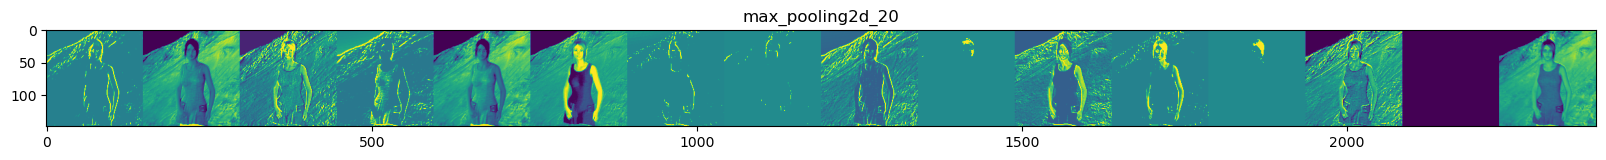

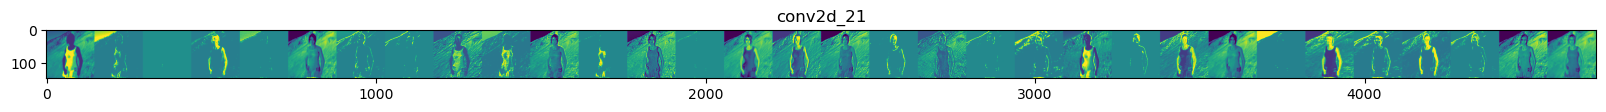

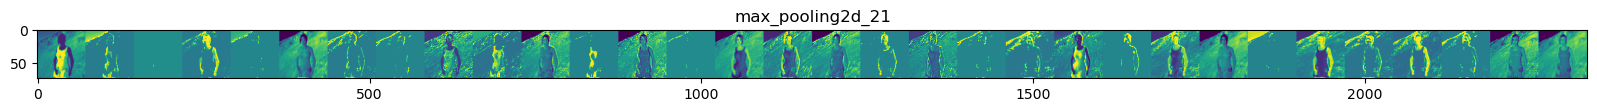

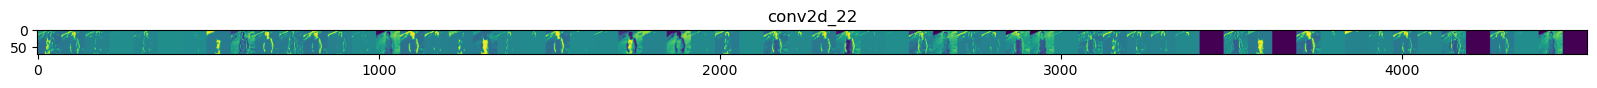

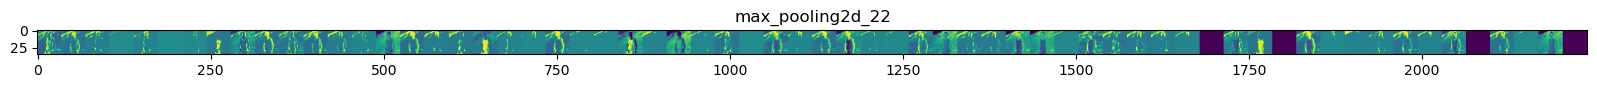

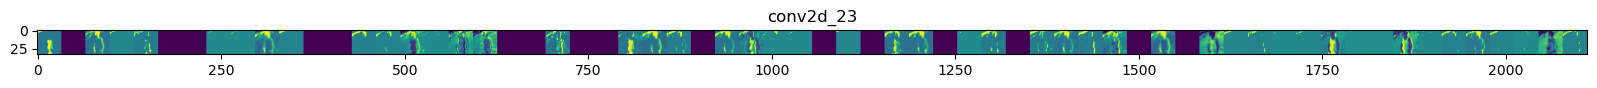

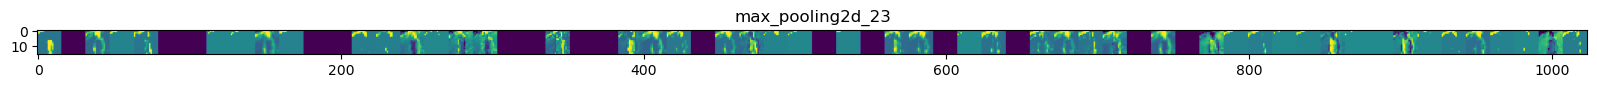

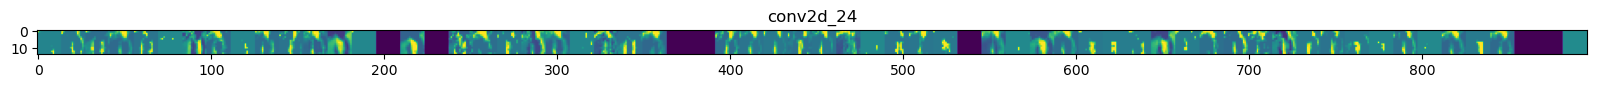

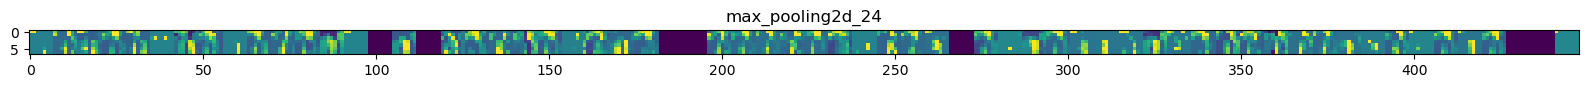

In [105]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')